<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-предобработка-данных" data-toc-modified-id="Загрузка-и-предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Общее-описание-данных" data-toc-modified-id="Общее-описание-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Общее описание данных</a></span></li><li><span><a href="#по-городам" data-toc-modified-id="по-городам-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>по городам</a></span></li><li><span><a href="#по-полу-клиента" data-toc-modified-id="по-полу-клиента-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>по полу клиента</a></span></li><li><span><a href="#Корреляция-факторов" data-toc-modified-id="Корреляция-факторов-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Корреляция факторов</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Сегментация-клиентов" data-toc-modified-id="Сегментация-клиентов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Сегментация клиентов</a></span><ul class="toc-item"><li><span><a href="#по-оттоку" data-toc-modified-id="по-оттоку-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>по оттоку</a></span></li><li><span><a href="#по-количеству-используемых-банковских-продуктов" data-toc-modified-id="по-количеству-используемых-банковских-продуктов-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>по количеству используемых банковских продуктов</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#о-равенстве-дохода-клиентов-с-одним-и-двумя-банковскими-продуктами" data-toc-modified-id="о-равенстве-дохода-клиентов-с-одним-и-двумя-банковскими-продуктами-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>о равенстве дохода клиентов с одним и двумя банковскими продуктами</a></span></li><li><span><a href="#о-равенстве-кредитного-скоринга-у-клиентов-с-разным-количеством-банковских-продуктов" data-toc-modified-id="о-равенстве-кредитного-скоринга-у-клиентов-с-разным-количеством-банковских-продуктов-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>о равенстве кредитного скоринга у клиентов с разным количеством банковских продуктов</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Прогнозирование оттока клиентов банка «Метанпромбанк» на основании сегментирования клиентов.

В ходе работы мы изучим массив данных о клиентах банка "Метанпромбанк", сегментируем пользователей по оттоку и по количеству используемых банковских продуктов, определим характерные для каждой группы черты. Мы также проверим, связаны ли доходы клиентов с количеством используемых ими продуктов банка и зависит ли от этого уровень кредитного скоринга.

**Материалы**:

[Дашборд](https://public.tableau.com/views/zyabirova_dashboard_bank_metanprom/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)

[Презентация](https://drive.google.com/file/d/1QnXNqNWAgEf5kN8uqndbMR0t78HNYZ6J/view?usp=sharing)

## Загрузка и предобработка данных

Для начала импортируем все библиотеки, которые потребуются нам в дальнейшей работе:

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
from scipy import stats as st
from sklearn.preprocessing import LabelEncoder  
import warnings
warnings.filterwarnings('ignore')

Прочитаем файл, воспользовавшись разделителем `sep`, и ознакомимся с его содержимым:

In [2]:
path = r"c:\users\79215\desktop\project\final_project\\"
try:
    df = pd.read_csv(path + 'bank_dataset.csv', sep=',')
except:
    df = pd.read_csv('/datasets/bank_dataset.csv', sep=',')

display(df.head())
df.info()

print('\n' + 'Количество дубликатов:', df.duplicated().sum())

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB

Количество дубликатов: 0


Итак, первичное ознакомление с данными обнажило перед нами следующие проблемы:
- некорректные наименования столбцов (отсутствие единообразия в использовании строчных и заглавных букв, а также несоблюдение "змеиного" регистра в `userid` и `CreditCard`);
- наличие пропусков в столбце `Balance` (более трети от всех данных!).

Для удобства анализа данных мы преобразуем категориальные переменные в столбцах `City` и `Gender` в числовые значения. Пол клиента в столбце `Gender` мы заменим числовыми лейблами с помощью `LabelEncoder()` и `fit_transform()`, а колонку `City` преобразуем во множество бинарных полей методом `get_dummies()`:

In [3]:
encoder =  LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df = pd.get_dummies(df)

Теперь разберёмся с названиями колонок: переименуем `userid` и `CreditCard`, а также образованные на предыдущем этапе три новых столбца с dummy-переменными, после чего приведём все знаки к строчному виду:

In [4]:
df.rename(columns={'userid':'user_id', 
                   'CreditCard':'credit_card', 
                   'City_Ростов Великий': 'rostov_v', 
                   'City_Рыбинск': 'rybinsk', 
                   'City_Ярославль': 'yaroslavl'}, inplace=True)

df.columns = df.columns.str.lower()

Чтобы решить, как действовать с пропусками в столбце `balance`, надо понять, что они означают: отсутствие данных по клиенту или нулевой баланс на счёте. Поэтому посмотрим на минимальные значения по этой колонке:

In [5]:
print('Минимальное значение в колонке balance:', df['balance'].min())

Минимальное значение в колонке balance: 3768.69


При таком минимальном показателе мы вряд ли можем утверждать, что пропуски означают нулевое значение баланса. Также логично было бы предположить, что ушедшие клиенты снимают со счетов все деньги - значит, информация о балансе может отсутствовать. Проверим эту версию:

In [6]:
df.query('churn == 1').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2037 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           2037 non-null   int64  
 1   score             2037 non-null   int64  
 2   gender            2037 non-null   int64  
 3   age               2037 non-null   int64  
 4   objects           2037 non-null   int64  
 5   balance           1537 non-null   float64
 6   products          2037 non-null   int64  
 7   credit_card       2037 non-null   int64  
 8   loyalty           2037 non-null   int64  
 9   estimated_salary  2037 non-null   float64
 10  churn             2037 non-null   int64  
 11  rostov_v          2037 non-null   uint8  
 12  rybinsk           2037 non-null   uint8  
 13  yaroslavl         2037 non-null   uint8  
dtypes: float64(2), int64(9), uint8(3)
memory usage: 196.9 KB


И это наше предположение оказалось ошибочным: из числа ушедших клиентов только четверть не имеет информации о балансе на счёте. Посмотрим, на распределение количества пропусков по городам:

In [7]:
print('Доля пропусков в г.Ростов Великий:', df.query('rostov_v == 1').isnull().sum().sum() / df.query('rostov_v == 1')['user_id'].count()) 
print('Доля пропусков в г.Ярославль: {:.1%}'.format(df.query('yaroslavl == 1').isnull().sum().sum() / df.query('yaroslavl == 1')['user_id'].count())) 
print('Доля пропусков в г.Рыбинск: {:.1%}'.format(df.query('rybinsk == 1').isnull().sum().sum() / df.query('rybinsk == 1')['user_id'].count())) 

Доля пропусков в г.Ростов Великий: 0.0
Доля пропусков в г.Ярославль: 48.2%
Доля пропусков в г.Рыбинск: 48.4%


Мы обнаружили, что пропуски отсутствуют по клиентам из Ростова Великого. Вероятно, дело может быть в особенностях какого-то банковского продукта, особенно распространённого в Ростове, или там более развиты зарплатные проекты... Одним словом, в связи с этим нельзя четко сказать, что пропуски - это нулевой баланс, а значит и заменить их нулями также невозможно. По этой причине мы сохраним отсутствующие значения в неизменном виде. 

### Вывод

In [8]:
display(df.head())
df.info()

,user_id,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,rostov_v,rybinsk,yaroslavl
0,15677338,619,0,42,2,NaN,1,1,1,101348.88,1,0,0,1
1,15690047,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,15662040,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0,1
3,15744090,699,0,39,1,NaN,2,0,0,93826.63,0,0,0,1
4,15780624,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   gender            10000 non-null  int64  
 3   age               10000 non-null  int64  
 4   objects           10000 non-null  int64  
 5   balance           6383 non-null   float64
 6   products          10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   loyalty           10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
 11  rostov_v          10000 non-null  uint8  
 12  rybinsk           10000 non-null  uint8  
 13  yaroslavl         10000 non-null  uint8  
dtypes: float64(2), int64(9), uint8(3)
memory usage: 888.8 KB


Итак, по результатам предобработки данных:
- столбцы с категориальными переменными преобразованы в числовые: в колонке `gender` значение "0" содержит информацию о женском поле клиента, "1" - о мужском; информация из колонки `City` выведена в три отдельных столбца с бинарными переменными;
- скорректированы наименования столбцов;
- сохранены пропуски. 

С такими данными можно работать, поэтому перейдём к их анализу. 

## Исследовательский анализ данных

### Общее описание данных

Посмотрим на описание данных по всем параметрам:

In [9]:
df.drop('user_id', axis=1).describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
score,10000.0,650.53,96.65,350.00,584.00,652.00,718.00,850.00
gender,10000.0,0.55,0.50,0.00,0.00,1.00,1.00,1.00
age,10000.0,38.92,10.49,18.00,32.00,37.00,44.00,92.00
objects,10000.0,5.01,2.89,0.00,3.00,5.00,7.00,10.00
balance,6383.0,119827.49,30095.06,3768.69,100181.98,119839.69,139512.29,250898.09
products,10000.0,1.53,0.58,1.00,1.00,1.00,2.00,4.00
credit_card,10000.0,0.71,0.46,0.00,0.00,1.00,1.00,1.00
loyalty,10000.0,0.52,0.50,0.00,0.00,1.00,1.00,1.00
estimated_salary,10000.0,100090.24,57510.49,11.58,51002.11,100193.92,149388.25,199992.48
churn,10000.0,0.20,0.40,0.00,0.00,0.00,0.00,1.00


По полученным значениям мы можем сделать следующие предварительные выводы:
- среди клиентов банка **примерно равное количество мужчин и женщин**;
- клиенты имеют приличный средний показатель кредитного скоринга - 650 при максимальном 850;
- пользователи банка - в возрасте **от 18 до 92 лет** (средний возраст - 37-39 лет);
- в среднем, клиенты банка **имеют 5 объектов собственности**;
- клиенты банка обычно **являются пользователями 1-2 банковских продуктов**;
- чуть больше **70% клиентов являются обладателями кредитной карты**;
- чуть более половины клиентов являются активными пользователями банковских услуг;
- **средний доход клиента банка - порядка ста тысяч рублей**, при этом достаточно высокий показатель стандартного отклонения, что говорит о существенном разбросе показателей (от 11 рублей до почти 200 000); 
- **половина клиентов банка - жители Ярославля**, по 25% проживают в Рыбинске и Ростове Великом;
- по текущим данным **отток клиентов составляет 20%**.

Далее оценим различие данных по городам и в зависимости от пола клиента.

### по городам

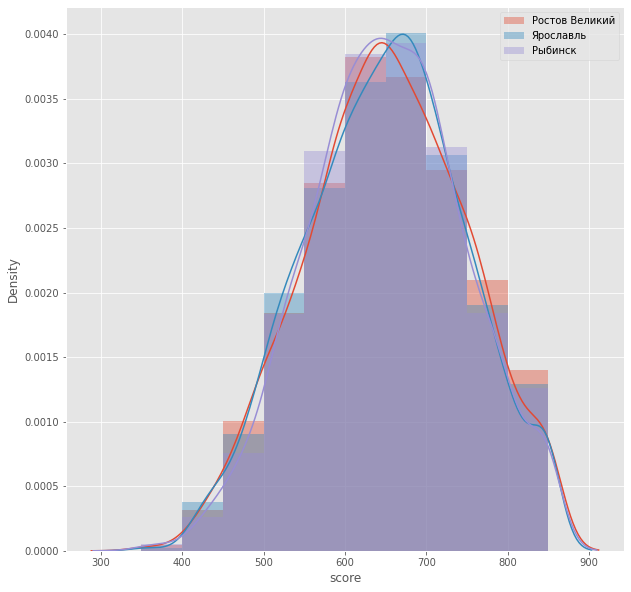

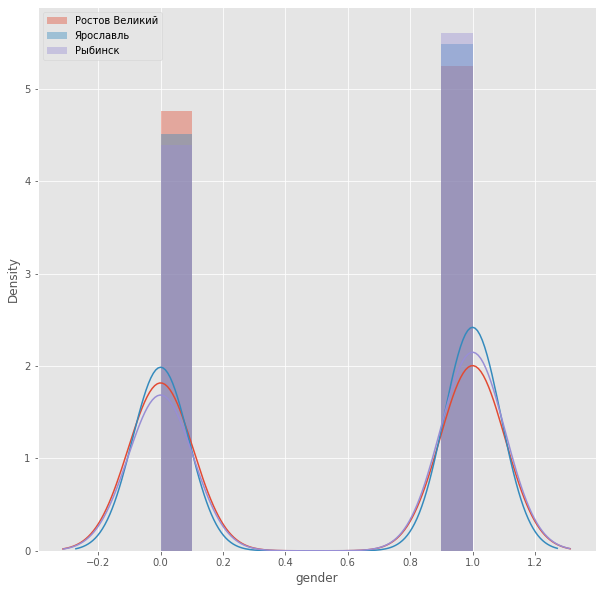

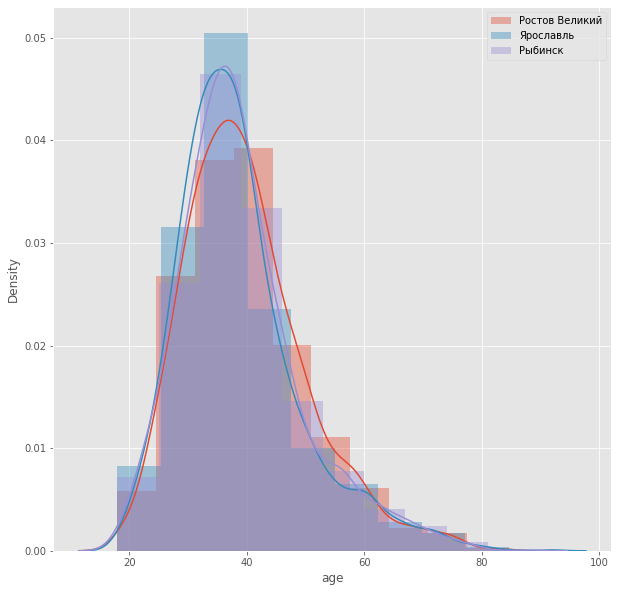

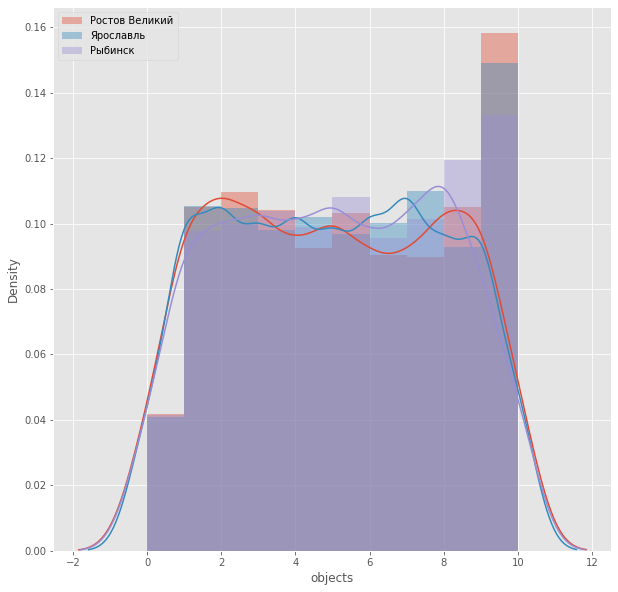

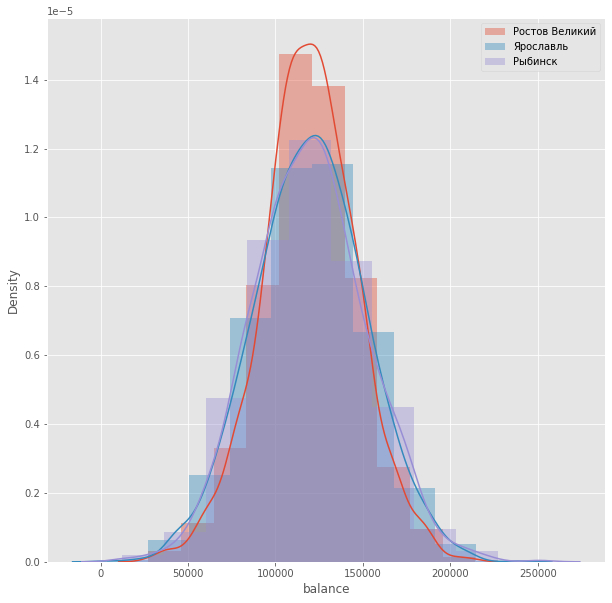

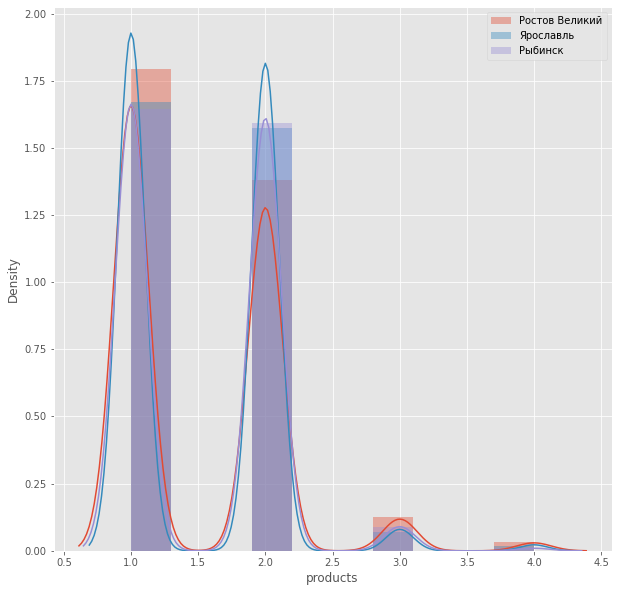

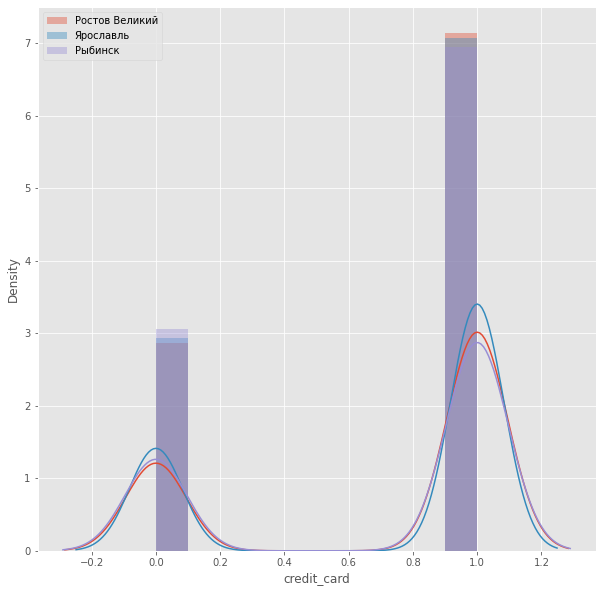

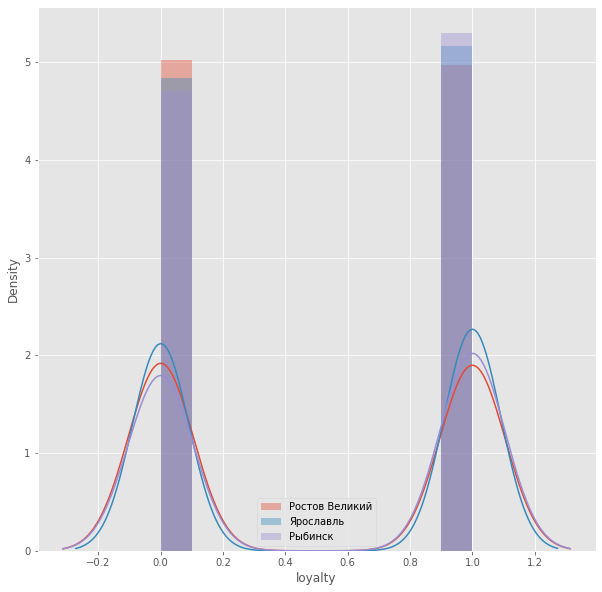

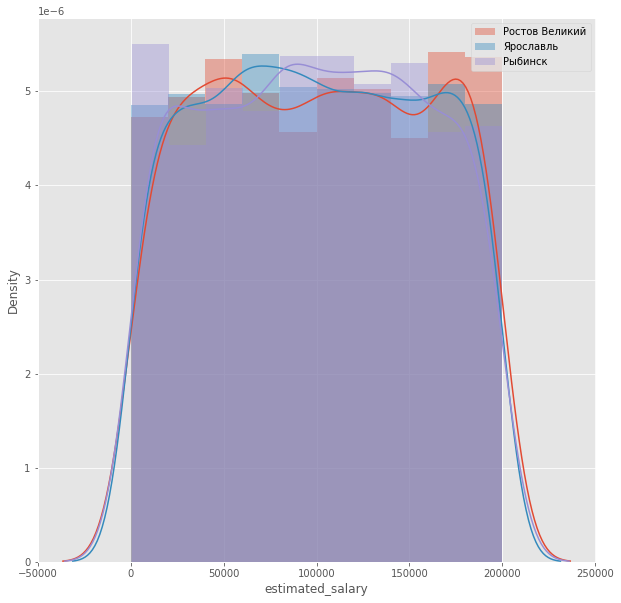

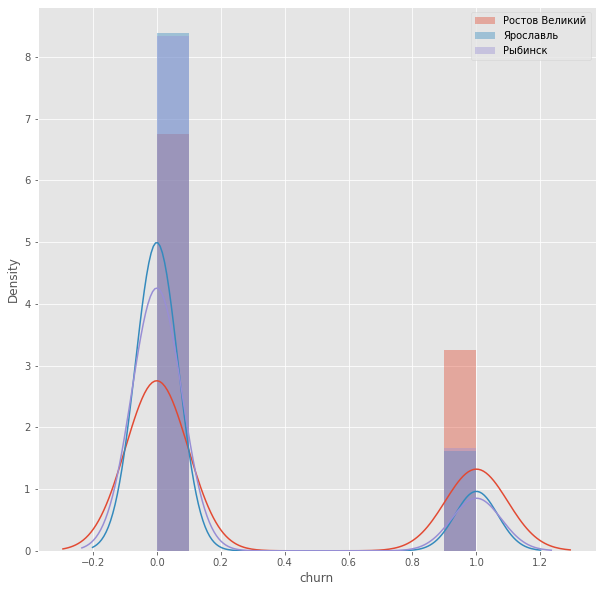

In [10]:
clm = list(df)
clm.remove('user_id')
del clm[10:]

plt.style.use('ggplot') 

# объявление функции отрисовки графиков по всем признакам в трёх городах:
def cities(df, column):
    plt.figure(figsize=(10, 10))
    sns.distplot(df.query('rostov_v == 1')[column], bins=10, label='Ростов Великий')
    sns.distplot(df.query('yaroslavl == 1')[column], bins=10, label='Ярославль')
    sns.distplot(df.query('rybinsk == 1')[column], bins=10, label='Рыбинск')
    plt.legend()
    plt.show()
    
for column in clm:
    cities(df, column)

В разбивке по городам следующие наблюдения:
- в среднем, уровень кредитного скоринга ярославских клиентов выше, чем в других городах - 670-680 баллов;
- во всех городах среди клиентов преобладают мужчины;
- по возрасту клиентов распределение примерно одинаковое.

**Также график демонстрирует нам, что в Ростове Великом наибольший уровень оттока клиентов.**

### по полу клиента

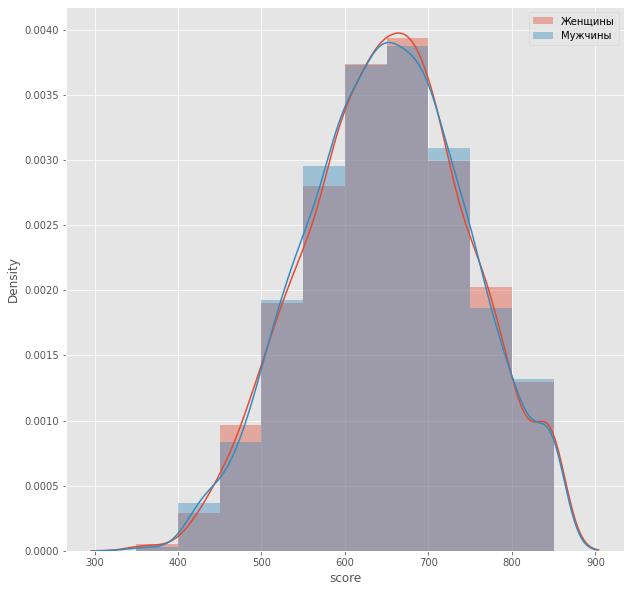

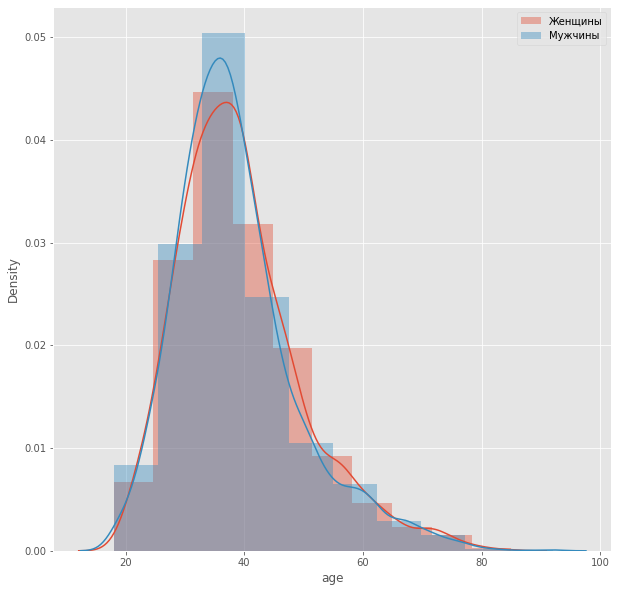

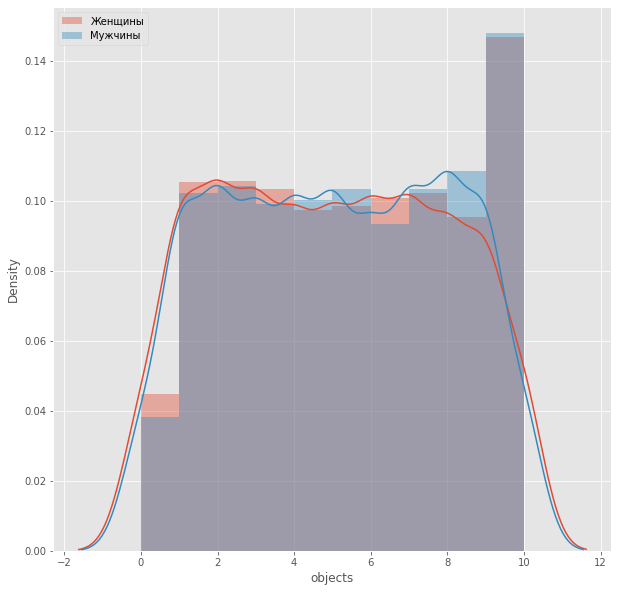

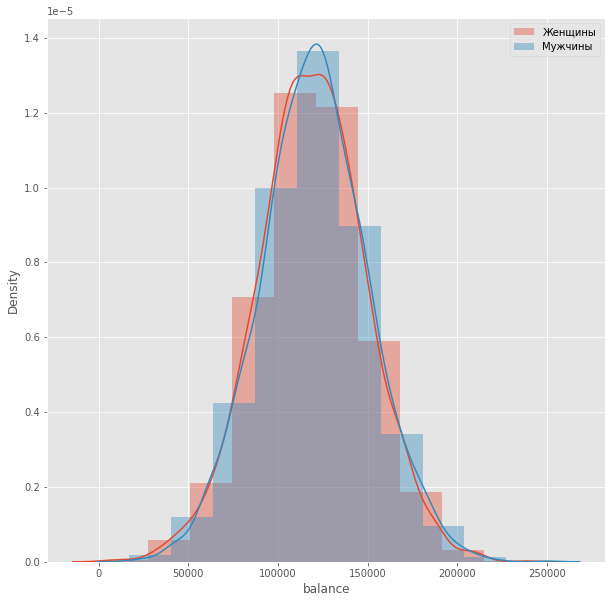

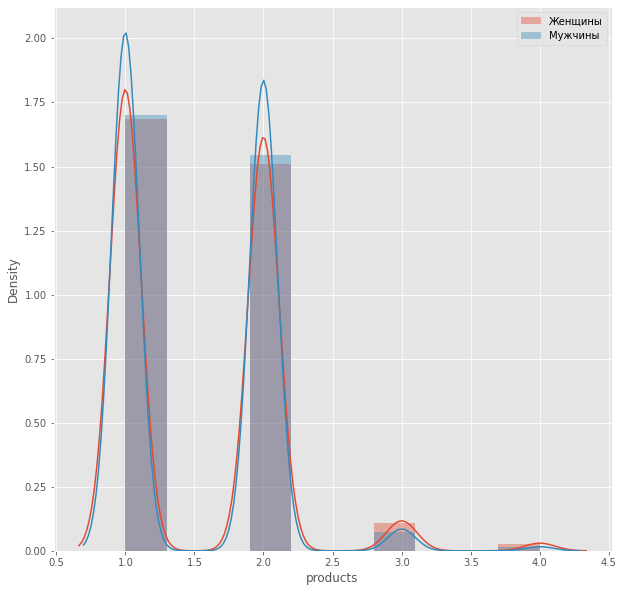

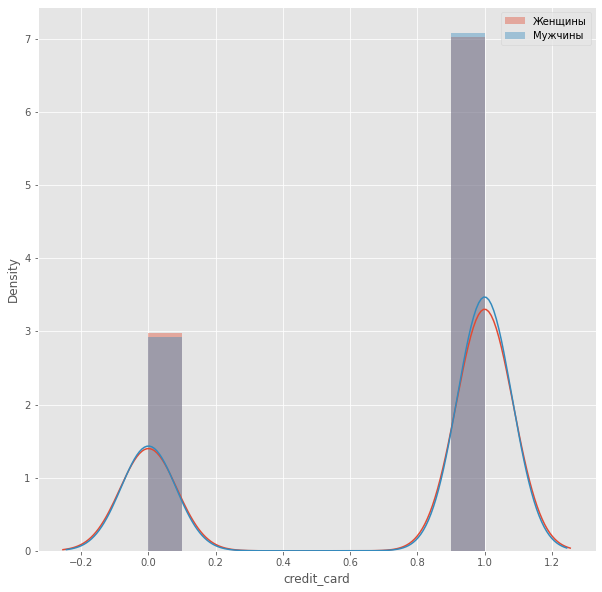

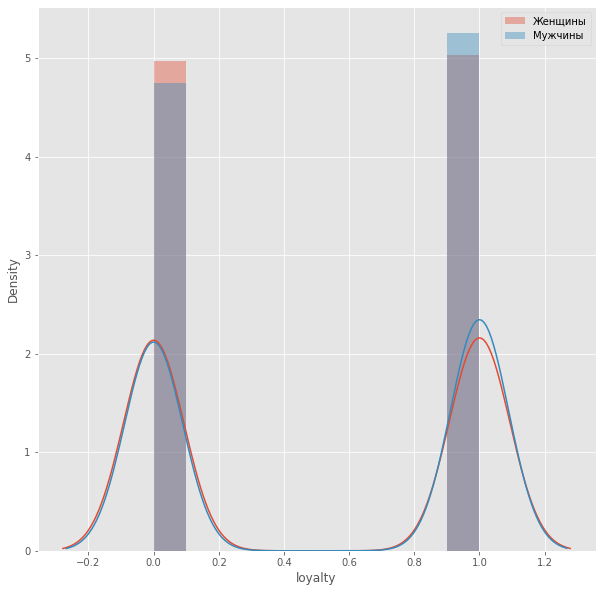

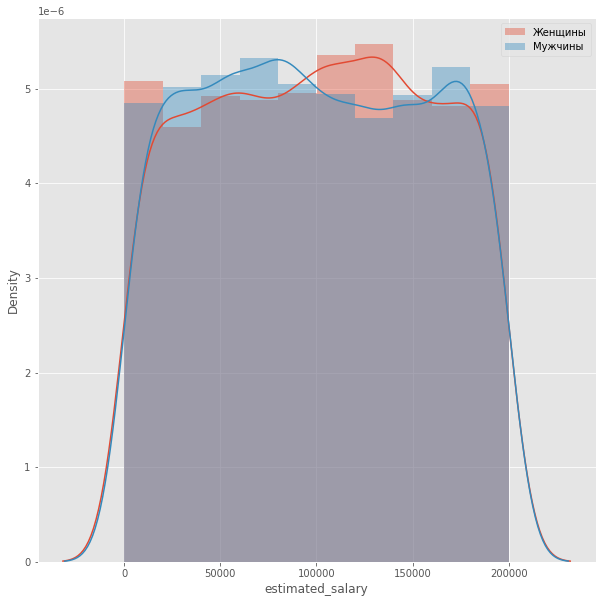

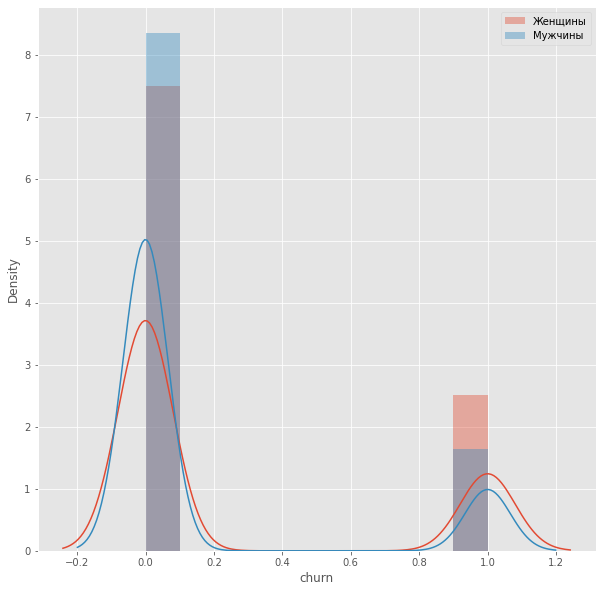

In [11]:
clm.remove('gender')

def genders(df, column):
    plt.figure(figsize=(10, 10))
    sns.distplot(df.query('gender == 0')[column], bins=10, label='Женщины')
    sns.distplot(df.query('gender == 1')[column], bins=10, label='Мужчины')
    plt.legend()
    plt.show()

for column in clm:
    genders(df, column)

В связи с полом клиента наблюдаются следующие различия:
- женщины немного старше мужчин;
- их кредитный скоринг также несколько выше;
- **мужчины чаще пользуются 1-2 банковскими продуктами, а женщины - 3-4;**
- среди мужчин преобладают активные клиенты и владельцы кредитных карт;
- женщины чаще мужчин имеют достаток в 100-150 тысяч;
- большее количество объектов в собственности - у мужчин;
- **наибольший отток среди женщин**.

### Корреляция факторов

Оценим, как сильно между собой коррелируют параметры, с которыми мы работаем:

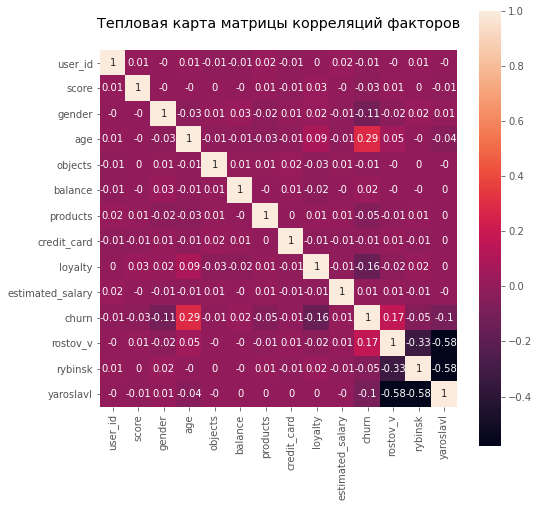

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr().round(2), annot=True, square=True)
plt.title('Тепловая карта матрицы корреляций факторов' + '\n')
plt.show()

Как мы видим, наибольшая корреляция между возрастом клиента и оттоком. На следующем этапе мы посмотрим, как отличается этот и другие параметры у оставшихся клиентов и тех, кто покинул банк.

### Вывод

В ходе предварительного анализа данных мы обнаружили, что отток клиентов составляет 20%. Далее предлагаем поискать характерные отличия клиентов, отказавшихся от услуг банка. А также попробовать найти взаимосвязи с количеством используемых продуктов.

## Сегментация клиентов

### по оттоку

Сравним средние показатели клиентов, покинувших банк, и тех, кто остался:

In [13]:
df.drop('user_id', axis=1).groupby('churn').mean().round(2).style.background_gradient(axis=0, high=5)  

,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,rostov_v,rybinsk,yaroslavl
churn,,,,,,,,,,,,
0,651.850000,0.570000,37.410000,5.030000,119535.860000,1.540000,0.710000,0.550000,99738.390000,0.210000,0.260000,0.530000
1,645.350000,0.440000,44.840000,4.930000,120746.970000,1.480000,0.700000,0.360000,101465.680000,0.400000,0.200000,0.400000


Итак, по данному сравнению о клиентах, покинувших банк, можно сказать следующее:
- их **уровень кредитного скоринга ниже**;
- среди них **преобладают клиенты женского пола**;
- **эти клиенты старше тех, кто остался** (средние 45 лет против средних 37 лет);
- среди них **меньше активных клиентов**;
- их **средний доход (и баланс на счёте) несколько выше**, чем у оставшихся клиентов.

Посчитаем, в каком городе наибольшая доля клиентов, ушедших "в отток":

In [14]:
df.pivot_table(index = ['rostov_v','rybinsk','yaroslavl'], values = 'churn', aggfunc = 'mean')

churn
rostov_v rybinsk yaroslavl          
0        0       1          0.161548
         1       0          0.166734
1        0       0          0.324432

Таким образом, **наибольший отток клиентов наблюдается в ростовском отделении банка**.

Посмотрим на параметры двух групп (те, кто ушёл, и те, кто остался) на гистограммах:

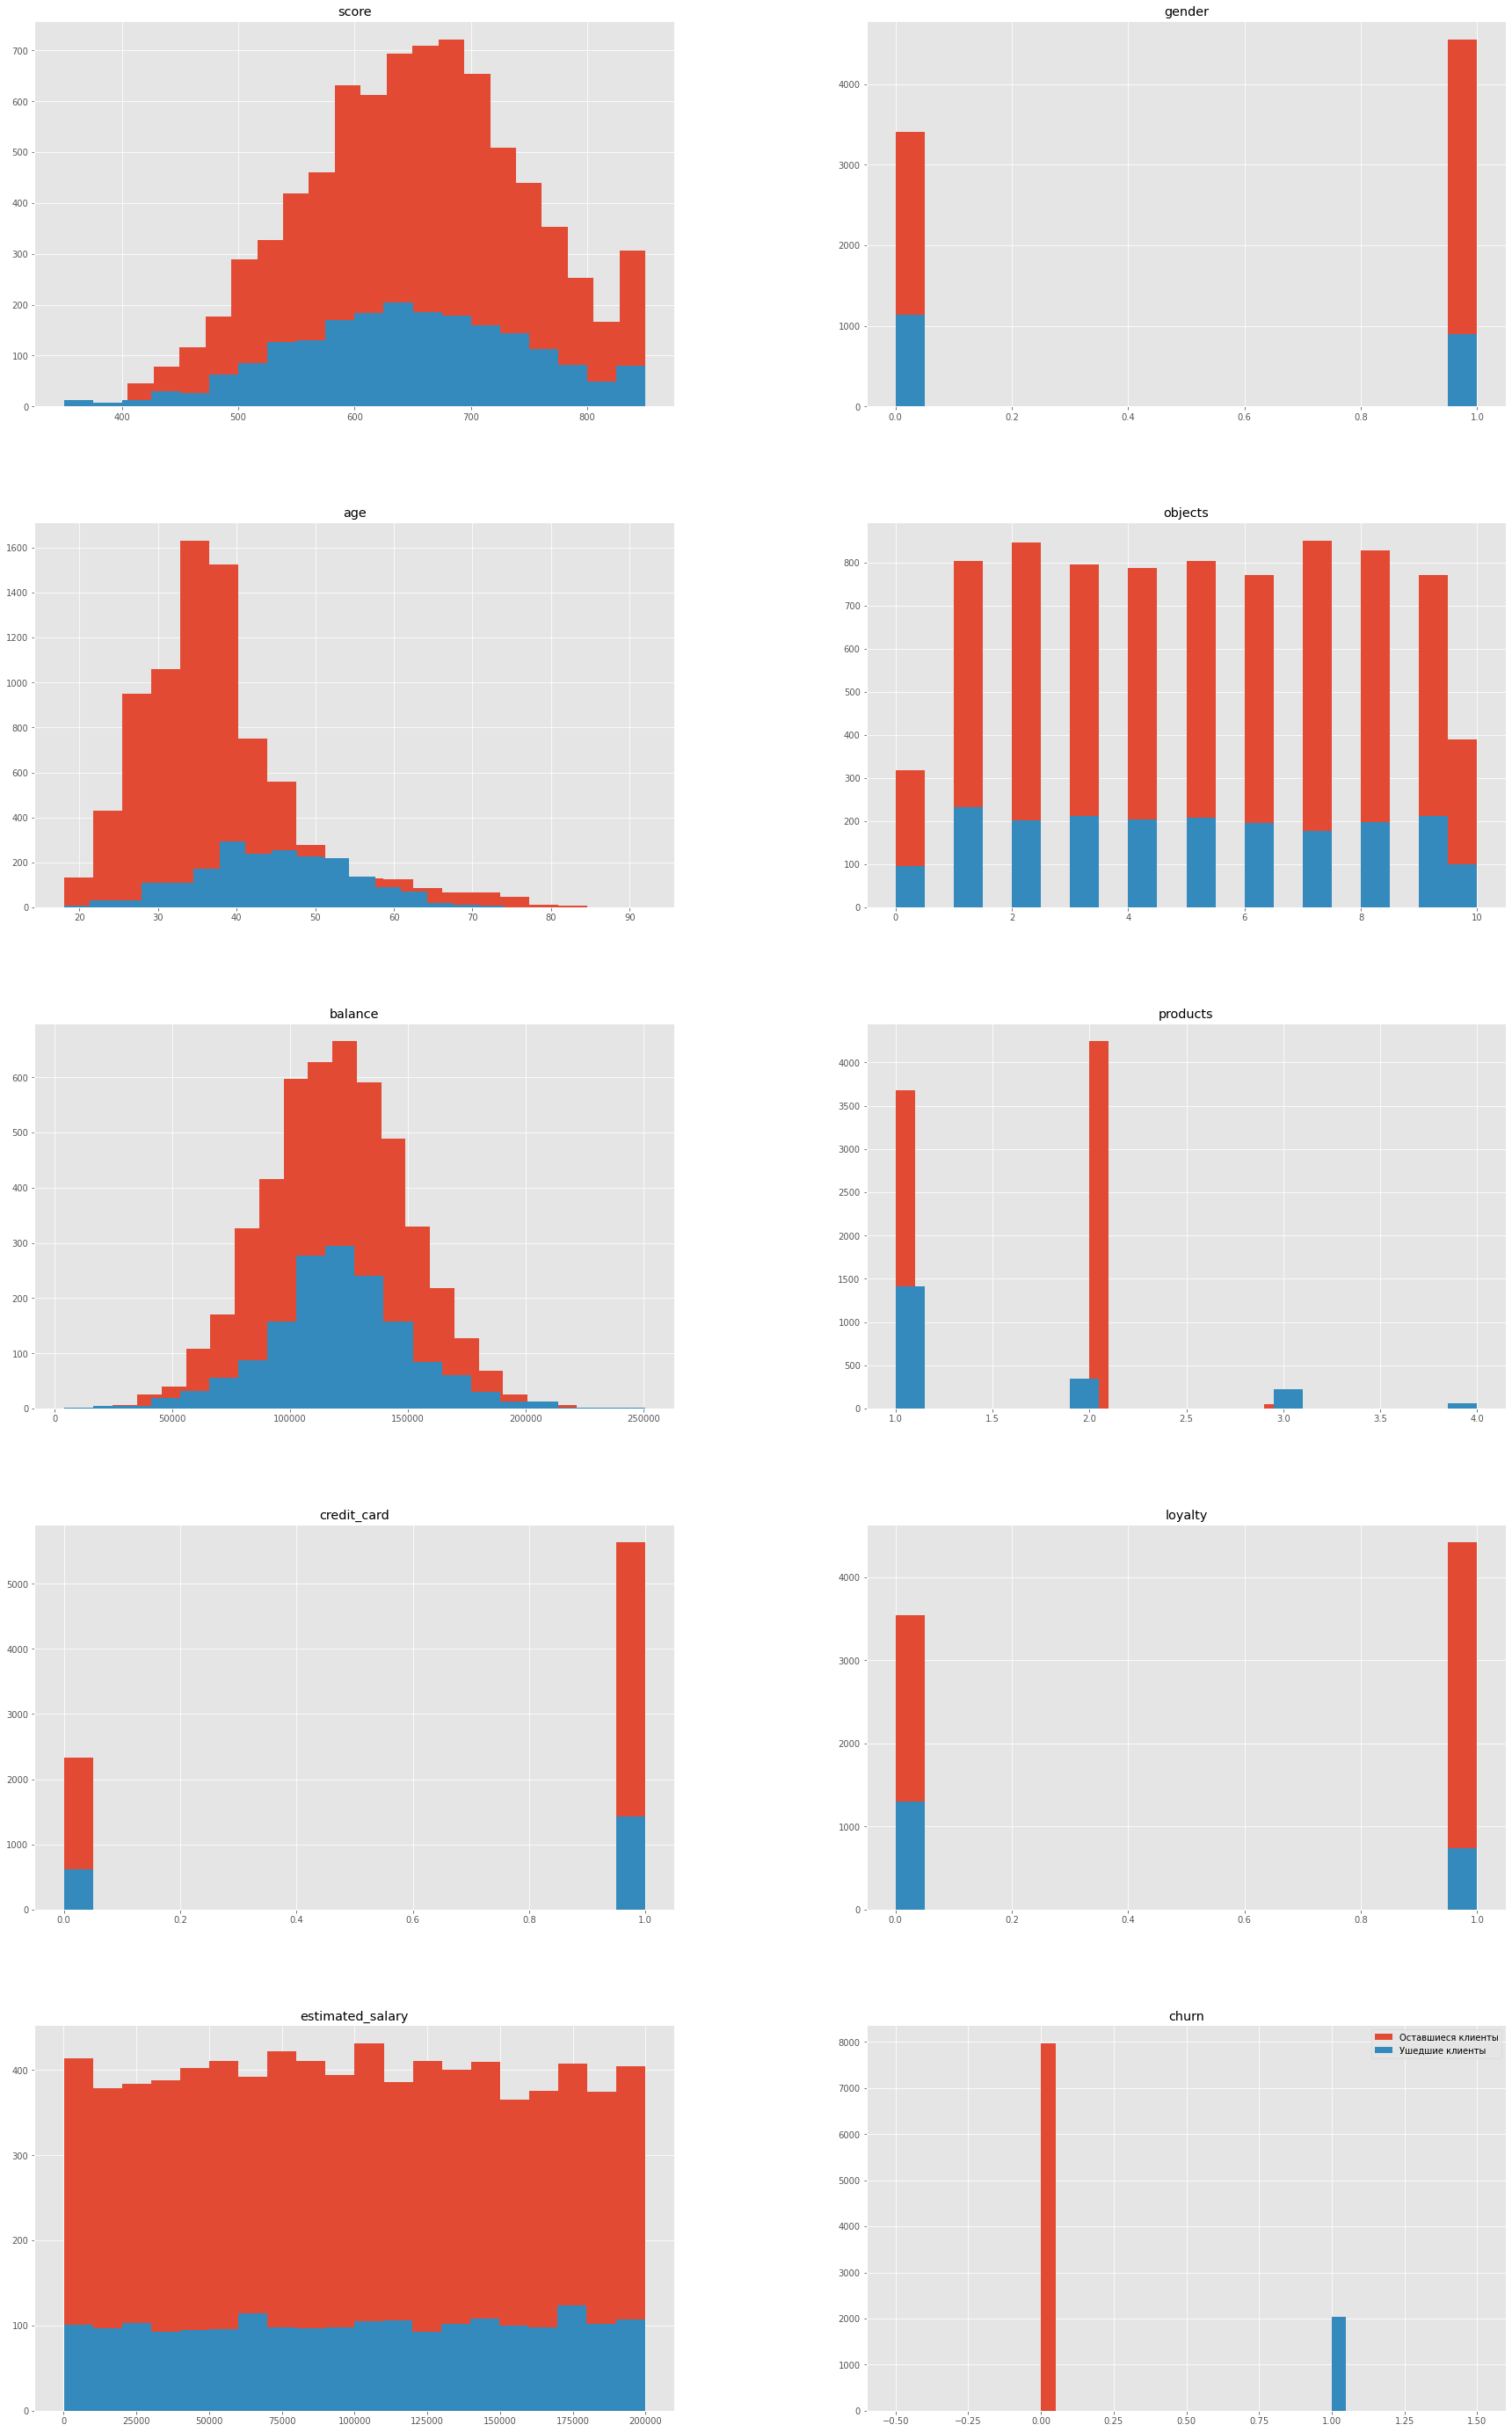

In [15]:
fig, axs = plt.subplots(5,2, figsize=(30, 50))
df.query('churn == 0').drop(['user_id', 'rostov_v','rybinsk','yaroslavl'], axis=1).hist(ax=axs, bins=20, label='Оставшиеся клиенты')
df.query('churn == 1').drop(['user_id', 'rostov_v','rybinsk','yaroslavl'], axis=1).hist(ax=axs, bins=20, label='Ушедшие клиенты')
plt.legend()
plt.show()

Благодаря графикам, мы имеем возможность конкретизировать наши предварительные выводы:
- **уровень кредитного скоринга у ушедших клиентов ниже**, чем у оставшихся (в среднем, 600-660 против 630-680);
- среди ушедших клиентов **больше женщин, чем мужчин**;
- **ушедшие клиенты старше оставшихся**: 40-50 лет против 35-40 лет;
- ушедшие клиенты, в основном, **пользуются одним банковским продуктом**, в то время как оставшиеся обычно используют два продукта;
- ушедшие клиенты демонстрируют меньшую активность.

Теперь сделаем сравнение по пользователям с разным количеством банковских продуктов.

### по количеству используемых банковских продуктов

Оценим средние показатели всех параметров у клиентов, имеющих разное количество банковских продуктов:

In [16]:
df.drop('user_id', axis=1).groupby('products').mean().round(2).style.background_gradient(axis=0, high=0.9)  

,score,gender,age,objects,balance,credit_card,loyalty,estimated_salary,churn,rostov_v,rybinsk,yaroslavl
products,,,,,,,,,,,,
1,649.120000,0.550000,39.670000,4.970000,119894.160000,0.700000,0.500000,99487.260000,0.280000,0.270000,0.240000,0.490000
2,652.190000,0.550000,37.750000,5.050000,119660.940000,0.710000,0.530000,100452.010000,0.080000,0.230000,0.260000,0.520000
3,648.110000,0.440000,43.200000,5.000000,119475.690000,0.710000,0.420000,104318.130000,0.830000,0.360000,0.250000,0.390000
4,653.580000,0.370000,45.680000,5.300000,122260.610000,0.680000,0.480000,104763.720000,1.000000,0.400000,0.120000,0.480000


По полученным цифрам можно сказать следующее:
- среди клиентов с 1-2 продуктами преобладают мужчины, а с 3-4 продуктами - женщины;
- **клиенты с 1-2 продуктами помоложе** (в среднем, 37-40 лет), в то время **как пользователи 3-4 продуктов - постарше** (в среднем, 43-46 лет);
- самый большой средний баланс на счёте у клиентов с 4 банковскими продуктами, у них же самая высокая средняя заработная плата;
- а вот **самый низкий средний доход у клиентов, использующих один продукт банка**;
- **наименьший показатель оттока у клиентов с двумя банковскими продуктами**, также не столь высокий процент ушедших клиентов у клиентов с двумя продуктами. А вот **клиенты с 4 продуктами все перестали быть клиентами банка**!

Посмотрим на распределение по городам:

In [17]:
df.pivot_table(index = ['rostov_v','rybinsk','yaroslavl'], columns='products', values='age', aggfunc = 'count')

products                       1     2    3   4
rostov_v rybinsk yaroslavl                     
0        0       1          2514  2367  104  29
         1       0          1221  1183   66   7
1        0       0          1349  1040   96  24

Во всех городах наблюдается одна и та же тенденция: больше клиентов с меньшим количеством банковских продуктов.

Визуализируем распределения признаков для клиентов с разным количеством продуктов. Но для признаков с бинарными и множественными значениями мы будем строить разные типы графиков, поэтому поделим их на две группы, для каждой объявим функции отрисовки графиков и передадим им соответствующие списки с наименованиями столбцов:

<Figure size 360x360 with 0 Axes>

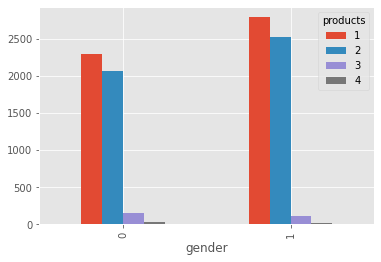

<Figure size 360x360 with 0 Axes>

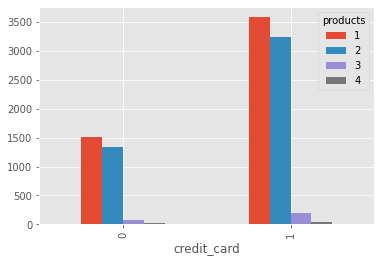

<Figure size 360x360 with 0 Axes>

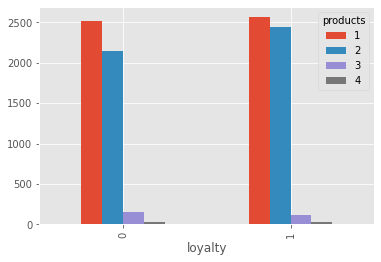

<Figure size 360x360 with 0 Axes>

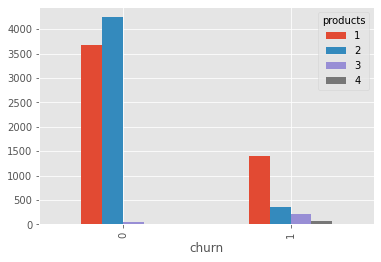

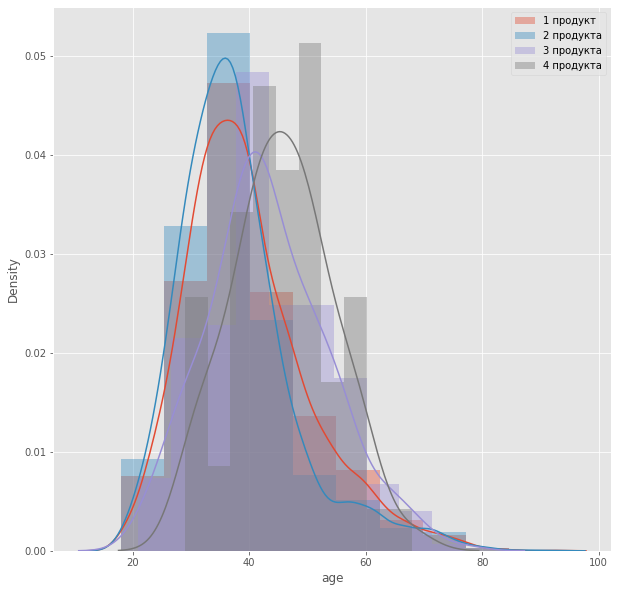

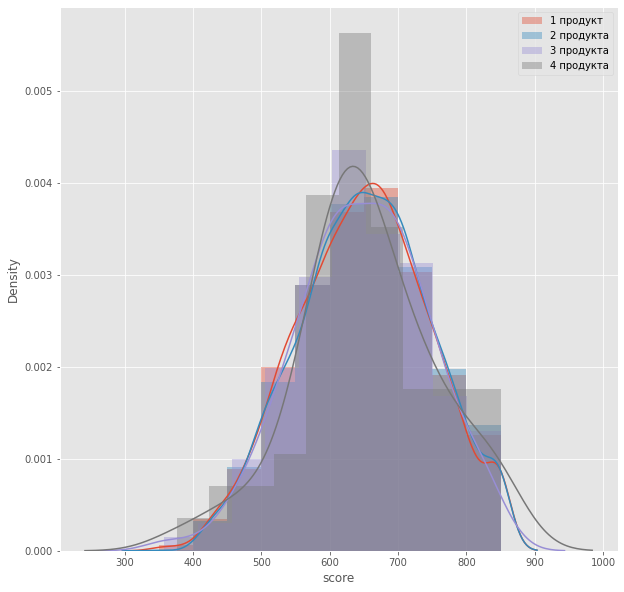

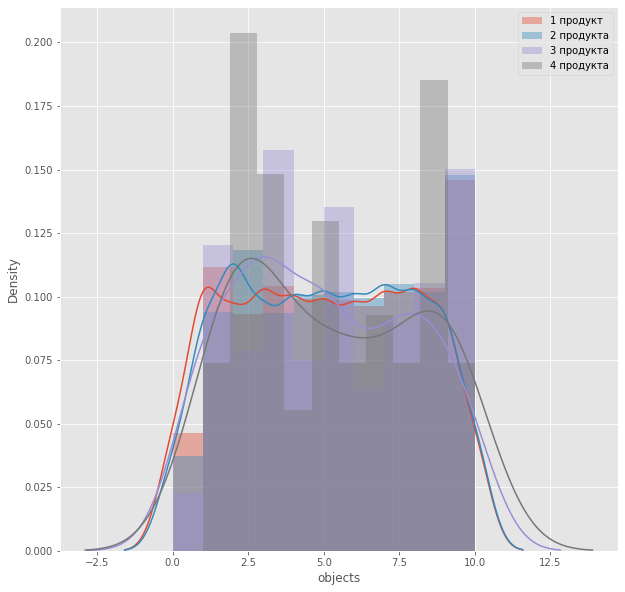

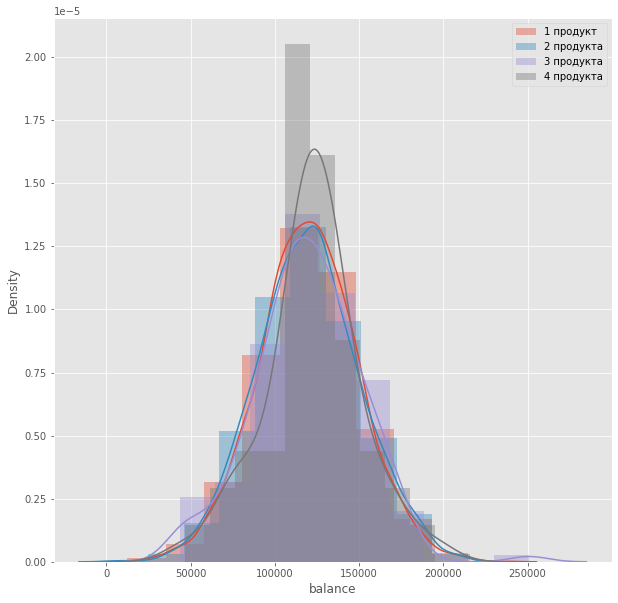

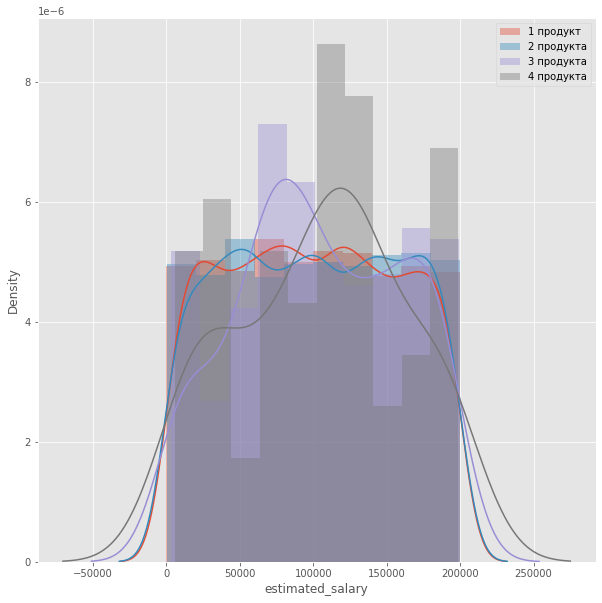

In [18]:
# список наименований колонок с бинарными значениями:
bi_columns = ['gender', 'credit_card', 'loyalty', 'churn']

# список наименований колонок с множественными значениями:
columns = ['age', 'score', 'objects', 'balance', 'estimated_salary']

# объявление функции отрисовки графиков для признаков с бинарными значениями:
def plot(df, column):
    plt.figure(figsize=(5, 5))
    df.pivot_table(index = column, columns = 'products', values = 'age', aggfunc = 'count').plot(kind='bar')
    plt.show();

# объявление функции отрисовки графиков для признаков с множественными значениями:
def distplot(df, column):
    plt.figure(figsize=(10, 10))
    sns.distplot(df.query('products == 1')[column], bins=10, label='1 продукт')
    sns.distplot(df.query('products == 2')[column], bins=10, label='2 продукта')
    sns.distplot(df.query('products == 3')[column], bins=10, label='3 продукта')
    sns.distplot(df.query('products == 4')[column], bins=10, label='4 продукта')
    plt.legend()
    plt.show()
    
for column in bi_columns:
    plot(df, column)

for column in columns:
    distplot(df, column)

Когда мы сравнивали средние значения по группам, то отметили для себя, что у пользователей с 3-4 продуктами показатели кредитного скоринга и заработной платы выше, чем у остальных клиентов. Тем не менее графики демонстрируют нам достаточно ровное распределение значений по этим критериям. Есть смысл проверить эти средние показатели этих параметров на статистическую значимость. Чем и займёмся на следующем этапе.

### Вывод

Мы выяснили, что все клиенты, которые пользуются четырьмя продуктами, покинули наш банк. Что характерно этой группе клиентов?
- В сравнении с другими группами (по количеству банковских продуктов), в ней самое большое число представительниц женского пола.
- Это самая зрелая возрастная группа - 45-50 лет.
- Среди них больше всего людей с крупными остатками на балансе.
- Они менее активны, чем клиенты с 1-2 продуктами.

## Проверка гипотез

### о равенстве дохода клиентов с одним и двумя банковскими продуктами

На предыдущем этапе мы увидели, что показатели заработной платы у клиентов с одним и двумя банковскими продуктами распределены равномерно. Значит ли это, что значения среднего дохода для этих двух групп не имеют статистической значимости?

Перед нами стоит задача проверить гипотезу о равенстве среднего двух независимых друг от друга генеральных совокупностей по взятым из них выборкам. Соответственно, мы будем использовать `scipy.stats.ttest_ind()`.

**Нулевая гипотеза в данном случае будет звучать так: "Средний доход клиентов, пользующихся двумя продуктами банка, равен среднему доходу клиентов, пользующихся одним продуктом".**

Альтернативная гипотеза: "Средний доход клиентов, пользующихся двумя продуктами банка, не равен среднему доходу клиентов, пользующихся одним продуктом".

In [19]:
# объявление критического уровня статистической значимости в 5%
alpha = 0.05 

# методу scipy.stats.ttest_ind() в качестве параметров передадим массивы, 
# содержащие выборки по заработной плате клиентов с 1 и 2 банковскими продуктами:
result = st.ttest_ind(df[df['products'] == 1]['estimated_salary'], df[df['products'] == 2]['estimated_salary'])
print('p-значение:', result.pvalue)

# сравнение полученного уровня значимости с установленным критическим
if (result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.41047183624949335
Не получилось отвергнуть нулевую гипотезу


Воспользуемся тестом Левена и проверим, имеют ли группы одинаковые отклонения:

In [20]:
st.levene(df[df['products'] == 1]['estimated_salary'], df[df['products'] == 2]['estimated_salary'])

LeveneResult(statistic=0.765873499314668, pvalue=0.3815183846030038)

Итак, **pvalue больше заданного нами критического уровня статистической значимости, нулевую гипотезу отвергнуть не получилось**: значит, показатели дохода клиентов, пользующихся одни или двумя банковскими продуктами, близки друг другу.

### о равенстве кредитного скоринга у клиентов с разным количеством банковских продуктов

Аналогично графики показали нам несущественное различие в уровне кредитного скоринга для клиентов с разным количеством банковских продуктов. Проверим, есть ли статистически значимая разница в кредитном скоринге у клиентов с малым (1-2) и большим (3-4) количеством продуктов.

Нулевая гипотеза: **"Средний уровень кредитного скоринга клиентов, пользующихся малым количеством продуктов банка, равен среднему уровню кредитного скоринга клиентов, пользующихся большим количеством продуктов"**.

In [21]:
result_2 = st.ttest_ind(df[df['products'] < 3]['score'], df[df['products'] > 2]['score'])
print('p-значение:', result_2.pvalue)

if (result_2.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.788094325319582
Не получилось отвергнуть нулевую гипотезу


Проведем тест Левена:

In [22]:
st.levene(df[df['products'] < 3]['score'], df[df['products'] > 2]['score'])

LeveneResult(statistic=0.284678437053034, pvalue=0.5936629317648807)

**Нулевая гипотеза не отвергнута**, следовательно средние показатели кредитного скоринга у клиентов с 1 или 2 банковскоими продуктами не имеют существенной разницы в сравнении с клиентами, которые пользуются 3 и 4 продуктами. 

### Вывод

Мы проверили две гипотезы - о равенстве дохода и уровня кредитного скоринга у клиентов с разным количеством банковских продуктов. Обе гипотезы отвергнуть не получилось.

## Общий вывод

Мы проанализировали данные о пользователях банка «Метанпром», сегментировали его клиентов исходя из оттока и количества используемых продуктов, а также проверили пару назревших гипотез. В результате исследования мы пришли к следующим открытиям:

1. Больше всего клиентов пользуется одним продуктом, предлагаемым банком. Среди ушедших клиентов также больше всего тех, кто обходится лишь одним банковским продуктом. Однако оставшиеся клиенты в основном пользуются двумя предложениями. Исходя из этого, можно было бы допустить, что количество продуктов в использовании является удерживающим фактором, но, вопреки ожиданиям, **абсолютно все клиенты с наибольшим количеством продуктов банка (4) находятся в оттоке**. 

2. Согласно п.1, **клиентов с двумя продуктами можно рассматривать как наиболее стабильную группу с наивысшим показателем активности**.

3. Также согласно п.1, **клиенты с четырьмя продуктами имеют наибольший риск попадания в отток**. Так как активность таких клиентов невысока, можно предположить, что эти продукты навязаны *(например, предлагаемое при выдаче кредита страхование заёмщиков или дополнительные кредитные карты)*. А если пользователи так легко отказываются сразу от нескольких услуг банка, то и не очень ему нужны. Клиентам из этой группы характерны следующие черты: преобладание женщин, возраст 45-50 лет, крупные остатки на балансе, невысокая активность. Уровень их кредитного скоринга, а также дохода критичным образом не отличаются от показателей клиентов с меньшим количеством продуктов - это мы можем утверждать благодаря выполненной проверке соответствующих гипотез. 

**Исходя из вышеперечисленных и других наблюдений можно дать следующие рекомендации по удержанию клиентов, склонных к оттоку:**
1. стоит рассмотреть дополнительные стимулирующие опции или условия, нацеленные на удержание более зрелой группы клиентов, которые чаще остальных оказываются в оттоке, например:
    - дебетовая карта для получения пенсии или социальных выплат с повышенным кэшбеком на покупки в аптеках, супермаркетах или на АЗС;
    - бесплатная доставка дебетовой карты после её изготовления по адресу клиента;
    - вклады на выгодных условиях именно для этой категории клиентов - "уДачный", "Урожай" и т.д.;
2. аналогично развивать предложения для клиенток-женщин, например:
    - весенний выпуск праздничных дебетовых карт с уникальным дизайном (возможна коллаборация с блоггерами) и кэшбеком в магазинах косметики/одежды/парфюмерии;
    - выгодные предложения по кредитам для женщин на приобретение автомобиля, крупной бытовой техники и т.д.;
    - летний выпуск дебетовых или кредитных карт для путешествий (также возможна коллаборация с известным лицом) - кэшбек за покупки за пределами домашнего региона, выгодная конвертация, удобное снятие наличных и т.д.
3. не масштабировать количество продуктов в потреблении у клиентов, а развивать стабильность использования ими имеющихся услуг, например:
    - развивать программы лояльности;
    - продвигать специальные предложения (SMS, PUSH-уведомления) для клиентов, рискующих уйти в отток (при падении активности или выводе сбережений со счетов);
    - поощрять постоянных клиентов - выстроить стимулирующую стратификацию до статуса VIP-клиента.
4. развивать положение банка в г. Ростов Великий, например:
    - заключить корпоративные проекты с предприятиями этого города;
    - проанализировать конкурентные предложения и разработать выгодно отличающиеся проекты потребительских кредитов и вкладов.